In [1]:
import sys
from pathlib import Path
import time

sys.path.append(Path.cwd().parents[1].as_posix())
import omnicloudmask
from omnicloudmask import (
    predict_from_load_func,
    load_s2,
)
import matplotlib.pyplot as plt

In [2]:
omnicloudmask.__version__

'1.7.0'

In [3]:
scene_dir = Path.cwd() / "speed test scenes"

In [4]:
scenes = list(scene_dir.glob("*.SAFE"))

In [5]:
assert len(scenes) == 20

In [6]:
times = {}
for model_version in [1.0, 2.0, 3.0, 4.0]:
    start = time.time()
    predict_from_load_func(
        scene_paths=scenes,
        load_func=load_s2,
        batch_size=4,
        inference_dtype="bf16",
        compile_models=False,
        model_version=model_version,
    )
    end_time = time.time()
    time_taken = end_time - start
    times[model_version] = time_taken

Running inference using cuda bfloat16:   0%|          | 0/20 [00:00<?, ?it/s]

Running inference using cuda bfloat16:   0%|          | 0/20 [00:00<?, ?it/s]

Running inference using cuda bfloat16:   0%|          | 0/20 [00:00<?, ?it/s]

Running inference using cuda bfloat16:   0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
times

{1.0: 179.8743815422058,
 2.0: 129.00292468070984,
 3.0: 133.18683409690857,
 4.0: 85.8446044921875}

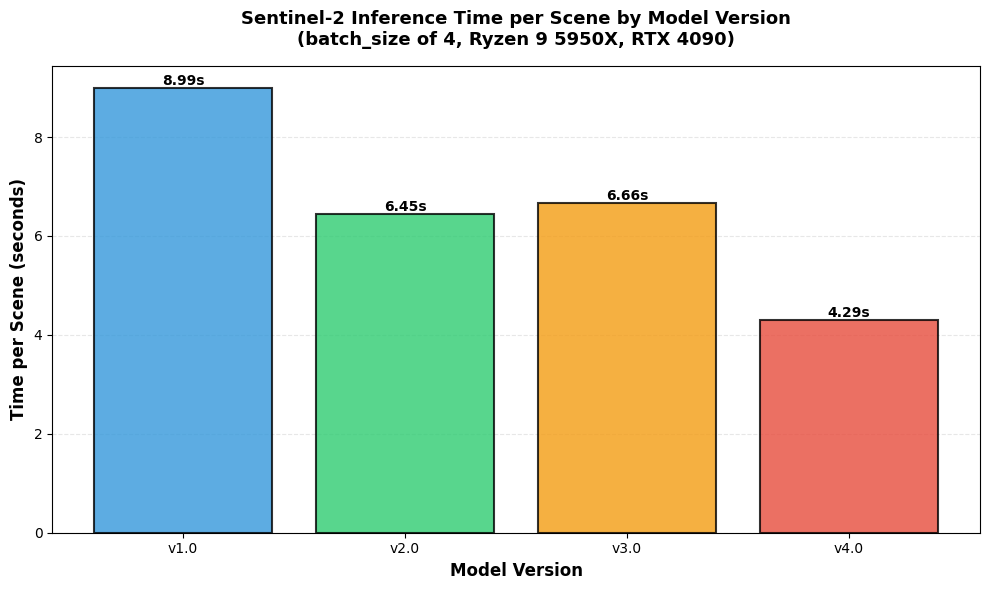

In [12]:
# Prepare data - calculate time per scene
num_scenes = len(scenes)
versions = list(times.keys())
times_per_scene = [times[v] / num_scenes for v in versions]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot: Inference Time per Scene
bars = ax.bar(
    versions,
    times_per_scene,
    color=["#3498db", "#2ecc71", "#f39c12", "#e74c3c"],
    edgecolor="black",
    linewidth=1.5,
    alpha=0.8,
)

ax.set_xlabel("Model Version", fontsize=12, fontweight="bold")
ax.set_ylabel("Time per Scene (seconds)", fontsize=12, fontweight="bold")
ax.set_title(
    f"Sentinel-2 Inference Time per Scene by Model Version\n(batch_size of 4, Ryzen 9 5950X, RTX 4090)",
    fontsize=13,
    fontweight="bold",
    pad=15,
)
ax.set_xticks(versions)
ax.set_xticklabels([f"v{v}" for v in versions])
ax.grid(axis="y", alpha=0.3, linestyle="--")
ax.set_axisbelow(True)

# Add value labels on bars
for bar, val in zip(bars, times_per_scene):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.2f}s",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.tight_layout()
plt.savefig(
    "model_version_speed_comparison.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
)
plt.show()